# Final Project

## Binary Classification using a Covolutional Neural Network

This binary image classification model utilizes two classes of both healthy skin and diseased skin in a diversity of skin tones in order to help combat the invisible bias contributing to misdiagnosis of skin disease in people of color.

### Data Preparation

Import dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, MaxPool2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from glob import glob

2023-12-10 22:25:06.407137: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Assign the directory paths of the training and testing datasets to a variable

In [2]:
train_data_path = "/Users/camille/Desktop/DTSC 3000/Final_Project/dataset/train"
test_data_path = "/Users/camille/Desktop/DTSC 3000/Final_Project/dataset/test"

Use the global module to search through the directory paths

In [3]:
output_classes =  len(glob(train_data_path + '/*'))
print("Number of output classes is: ", output_classes)

Number of output classes is:  2


Determine the number of images in each dataset

In [4]:
train_files = glob(train_data_path + '/*/*.jp*g')
test_files = glob(test_data_path + '/*/*.jp*g')

print("Number of images for training: ", len(train_files))
print("Number of images for testing: ", len(test_files))

Number of images for training:  60
Number of images for testing:  20


### Using Image Generators

Import dependencies

In [5]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

Create two instances of the ImageDataGenerator class

In [6]:
train_data_generator = ImageDataGenerator(rescale = 1./255,
                                          shear_range = 0.2,
                                          zoom_range = 0.2,
                                          horizontal_flip = True)

test_data_generator = ImageDataGenerator(rescale = 1./255)

Use the flow_from_directory() function to read in the images from the training and testing datasets using their directory paths in order to generate augmented images while the CNN is learning

In [7]:
training_data = train_data_generator.flow_from_directory(train_data_path,
                                                         target_size = (64, 64),
                                                         batch_size = 16,
                                                         class_mode = 'binary')

test_data = test_data_generator.flow_from_directory(test_data_path,
                                                    target_size = (64, 64),
                                                    batch_size = 16,
                                                    class_mode = 'binary')

Found 60 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


### Developing the CNN Model

Determine the layers that constitute the convolutional neural network

In [8]:
input_layer = Input(shape = (64, 64, 3))

# Convolutional layer with 32 output feature maps, kernel size of 3x3, and ReLu activation function performed on the input layer
conv1 = Conv2D(32, (3,3), strides = 2, activation= 'relu')(input_layer)
# Pooling layer reporting the maximum output from each 2x2 neighborhood of the conv1 layer 
maxpool1 = MaxPool2D(pool_size = (2, 2))(conv1)

# Convolutional layer with 64 output feature maps
conv2 = Conv2D(64, (3,3), strides = 2, activation= 'relu')(maxpool1)
# Pooling layer reporting the maximum output from each 2x2 neighborhood of the conv2 layer
maxpool2 = MaxPool2D(pool_size = (2, 2))(conv2)

# Flatten layer to convert array of feature maps to a single dimension vector
flat1 = Flatten()(maxpool2)

##### End of Convolution, Start of Neural Network #####

# Densely connected layer in which all neurons are connected to each other with a ReLu activation function
dense1 = Dense(256, activation = 'relu')(flat1)
# Output layer using a sigmoid function to arrive at one of two outputs from the dense1 layer
output_layer = Dense(1, activation= 'sigmoid')(dense1)

model = Model(input_layer, output_layer)

Compile the layers of the model together using the adam optimizer algorithm, the binary cross entropy loss function for binary classification, and accuracy as the metric

In [9]:
model.compile(optimizer = 'adam', loss= 'binary_crossentropy', metrics =['accuracy'])

### Training the Model

In [11]:
# Determine the steps_per_epoch and validation_steps based on the number of times the ImageDataGenerator takes in images from directory
spe = len(train_files)/16
vs = len(test_files)/16

# Train the CNN model
model_history = model.fit(training_data, steps_per_epoch = spe ,  epochs=20, validation_data = test_data,  validation_steps = vs, verbose=1)

Epoch 1/20
3/3 [==============================] - 1s 370ms/step - loss: 0.5485 - accuracy: 0.7333 - val_loss: 0.6912 - val_accuracy: 0.5500
Epoch 2/20
3/3 [==============================] - 1s 296ms/step - loss: 0.5384 - accuracy: 0.7000 - val_loss: 0.5939 - val_accuracy: 0.7500
Epoch 3/20
3/3 [==============================] - 1s 301ms/step - loss: 0.5040 - accuracy: 0.7333 - val_loss: 0.5648 - val_accuracy: 0.8000
Epoch 4/20
3/3 [==============================] - 1s 312ms/step - loss: 0.4775 - accuracy: 0.7667 - val_loss: 0.6062 - val_accuracy: 0.8000
Epoch 5/20
3/3 [==============================] - 1s 279ms/step - loss: 0.4829 - accuracy: 0.7833 - val_loss: 0.5612 - val_accuracy: 0.7000
Epoch 6/20
3/3 [==============================] - 1s 293ms/step - loss: 0.4667 - accuracy: 0.7667 - val_loss: 0.5525 - val_accuracy: 0.8000
Epoch 7/20
3/3 [==============================] - 1s 310ms/step - loss: 0.4136 - accuracy: 0.8167 - val_loss: 0.5126 - val_accuracy: 0.8000
Epoch 8/20
3/3 [====

The test accuracy peaks at 0.9 in the twefth epoch, then vacillates between higher and lower values. The test accuracy stagnates at 0.8 before reaching 0.9 in the last epoch.

### Plotting Model Metrics

Plot training accuracy against test accuracy

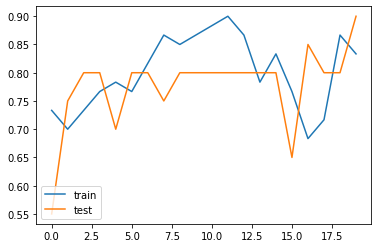

In [12]:
plt.plot(model_history.history['accuracy'], label = 'accuracy')
plt.plot(model_history.history['val_accuracy'], label = 'val_accuracy')
plt.legend(['train','test'], loc='lower left')

Plot training loss against test loss

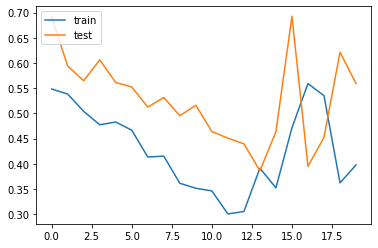

In [13]:
plt.plot(model_history.history['loss'], label = 'loss')
plt.plot(model_history.history['val_loss'], label = 'val_loss')
plt.legend(['train','test'], loc='upper left')

### Model Evaluation

Input the test data and measure the subsequent accuracy and loss as the metrics

In [14]:
score = model.evaluate(test_data, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5594646334648132
Test accuracy: 0.8999999761581421
